Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 4, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Test Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



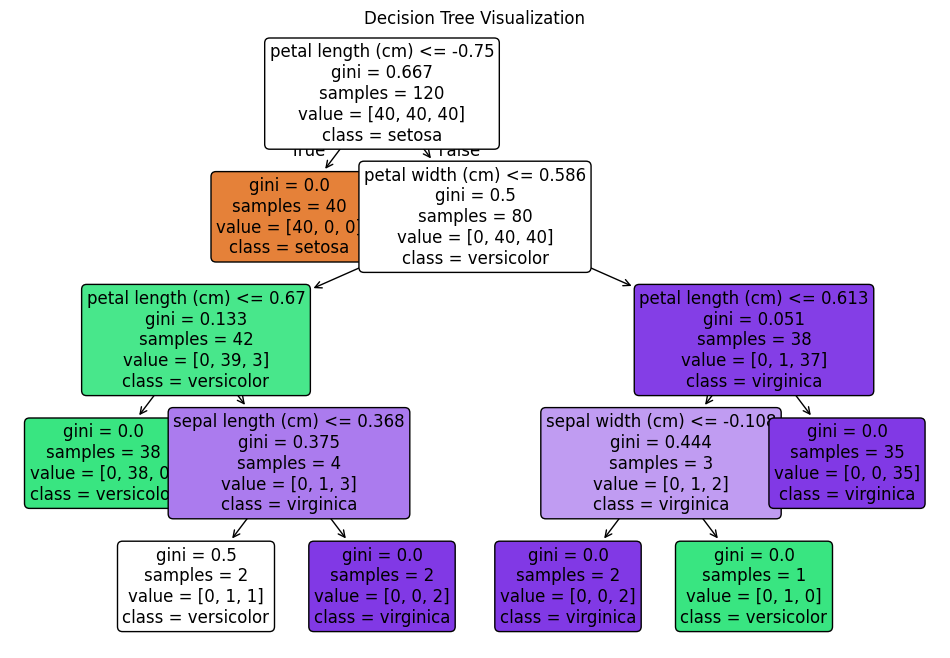

In [1]:
# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 2️⃣ Load Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 3️⃣ Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4️⃣ Create Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for tree-based models
    ('dt', DecisionTreeClassifier(random_state=42))
])

# 5️⃣ Hyperparameter Tuning
param_grid = {
    'dt__max_depth': [2, 3, 4, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 6️⃣ Best Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7️⃣ Visualize Decision Tree
plt.figure(figsize=(12,8))
plot_tree(best_model.named_steps['dt'], feature_names=data.feature_names, 
          class_names=data.target_names, filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()
